In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import json

# Index Creation

This Jupyter Notebook creates a Market Cap Weighted Index for the electric vehicle (EV) sector, tracking the performance of major EV-related companies over the last 5 years. By fetching historical stock data and current market capitalizations using `yfinance`, it calculates a weighted average of stock prices, where each company's influence is proportional to its market size. This index offers insights into the EV market's health and growth, reflecting investor confidence and market trends, aiding in the analysis of factors driving EV adoption.

In [37]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [38]:
import yfinance as yf

# Get market cap for Tesla
tesla = yf.Ticker("TSLA")
market_cap = tesla.info['marketCap']

print(f"Tesla Market Cap: {market_cap}")


Tesla Market Cap: 638391156736


In [39]:
def fetch_data(ticker_list, period='5y'):
    """Fetch historical adjusted closing prices and current market caps."""
    data = yf.download(ticker_list, period=period)['Adj Close']
    market_caps = {ticker: yf.Ticker(ticker).info['marketCap'] for ticker in ticker_list}
    return data, market_caps

stock_data, market_caps = fetch_data(tickers)


[*********************100%%**********************]  9 of 9 completed


In [40]:
def compute_weighted_index(data, weights):
    """Compute a market cap weighted index of the stock data."""
    normalized_data = data / data.iloc[0]  # Normalize data to the first row
    
    # Convert market caps to weights
    total_market_cap = sum(weights.values())
    weight_series = pd.Series(weights) / total_market_cap
    
    # Ensure the order of weights matches the columns in the data
    ordered_weights = weight_series[data.columns].values
    
    # Calculate the weighted sum
    weighted_data = normalized_data.multiply(ordered_weights, axis='columns')
    index = weighted_data.sum(axis=1)
    
    return index

ev_index = compute_weighted_index(stock_data, market_caps)


[*********************100%%**********************]  9 of 9 completed


<AxesSubplot:title={'center':'EV Market Cap Weighted Index (Last 5 Years)'}, xlabel='Date'>

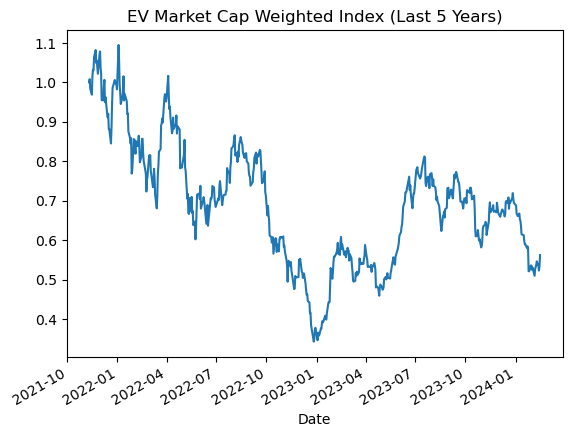

In [41]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols of companies focused on EVs
tickers = ['TSLA', 'NIO', 'XPEV', 'LI', 'RIVN', 'LCID', 'FSR', 'BYDDF', 'CHPT']

# Fetch historical stock data and current market cap for the last 5 years
def fetch_data(tickers):
    data = yf.download(tickers, period='5y')['Adj Close']
    market_caps = {ticker: yf.Ticker(ticker).info['marketCap'] for ticker in tickers}
    return data.dropna(), market_caps

stock_data, market_caps = fetch_data(tickers)

# Normalize the stock data (optional step for comparison)
normalized_data = stock_data / stock_data.iloc[0]

# Calculate the market cap weights
total_market_cap = sum(market_caps.values())
weights = {ticker: market_caps[ticker] / total_market_cap for ticker in tickers}

# Compute the weighted index
def compute_weighted_index(data, weights):
    weighted_data = data.copy()
    for ticker in tickers:
        weighted_data[ticker] = data[ticker] * weights[ticker]
    index = weighted_data.sum(axis=1)
    return index

ev_index = compute_weighted_index(normalized_data, weights)

# Plot the index
ev_index.plot(title='EV Market Cap Weighted Index (Last 5 Years)')


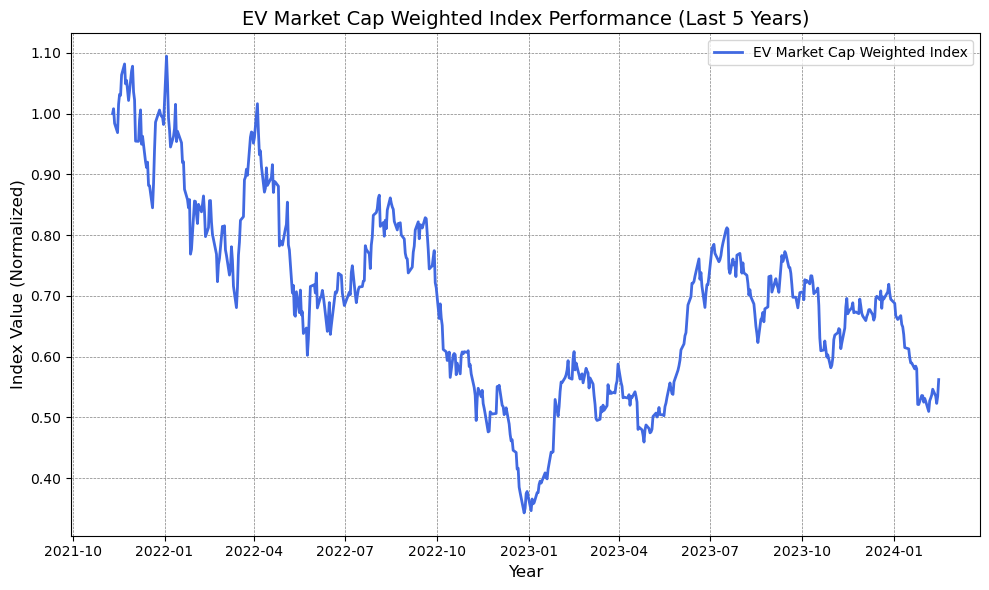

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Assuming 'ev_index' is your Pandas Series or DataFrame column with the index data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the index
ax.plot(ev_index.index, ev_index, label='EV Market Cap Weighted Index', color='royalblue', linewidth=2)

# Custom formatter function to round tick labels to two decimal points
def two_decimal_format(x, pos):
    return '{:.2f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(two_decimal_format))

# Adding grid, legend, and labels for aesthetics
ax.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
ax.legend()
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index Value (Normalized)', fontsize=12)
ax.set_title('EV Market Cap Weighted Index Performance (Last 5 Years)', fontsize=14)

plt.tight_layout()
plt.show()